<a href="https://colab.research.google.com/github/mtwatso2-eng/ANS128/blob/main/Lab5_1_BasicStatistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model-based inference and Randomization (design-based inference)


## Animal Behavior Study

Experimental units: animals
Treatment: type of reinforcement used during training (one group receives reward-based training, the other receives routine-based training)
Random assignment: 24 animals in the first group, 23 in the second group
Response: average of 12 evaluations of performance on a 40-point scale

Observed data

Group 1

12.0   12.0   12.9   13.6   16.6   17.2

17.5   18.2   19.1   19.3   19.8   20.3

20.5   20.6   21.3   21.6   22.1   22.2

22.6   23.1   24.0   24.3   26.7   29.7

Group 2

5.0      5.4      6.1   10.9   11.8   12.0

12.3   14.8   15.0   16.8   17.2   17.2

17.4   17.5   18.5   18.7   18.7   19.2

19.5   20.7   21.2   22.1   24.0

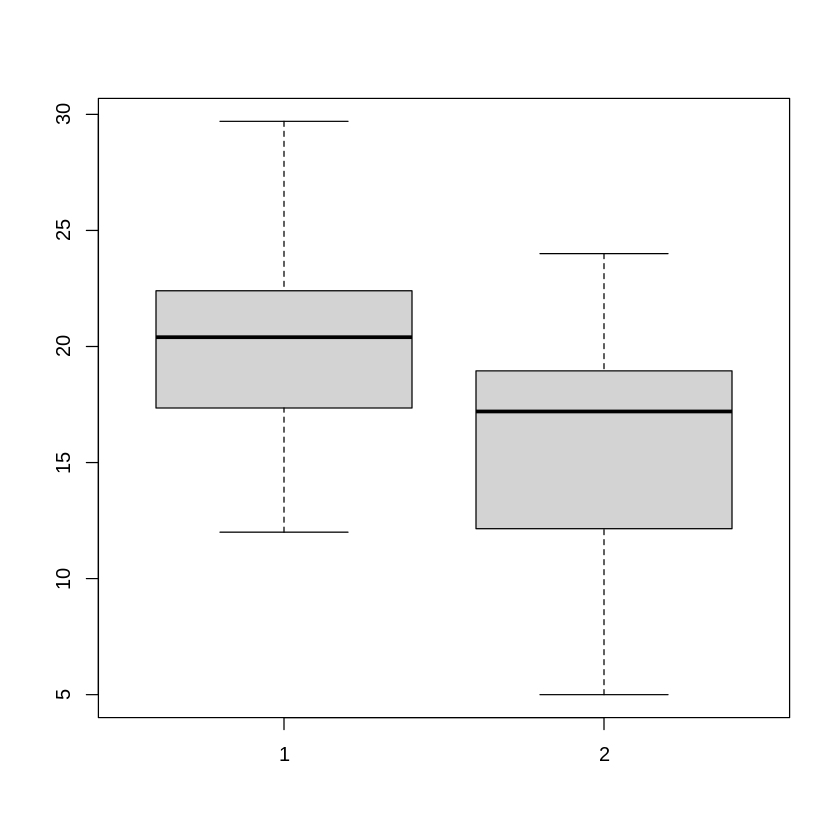

In [ ]:
group1 = c(12.0, 12.0, 12.9, 13.6, 16.6, 17.2,
              17.5, 18.2, 19.1, 19.3, 19.8, 20.3,
              20.5, 20.6, 21.3, 21.6, 22.1, 22.2,
              22.6, 23.1, 24.0, 24.3, 26.7, 29.7)
group2 = c( 5.0,  5.4,  6.1, 10.9, 11.8, 12.0,
              12.3, 14.8, 15.0, 16.8, 17.2, 17.2,
              17.4, 17.5, 18.5, 18.7, 18.7, 19.2,
              19.5, 20.7, 21.2, 22.1, 24.0)

ngroup1 = length(group1)
boxplot(group1,group2)

## Model-based Inference

In [ ]:
t.test(group1, group2, var.equal = TRUE)


	Two Sample t-test

data:  group1 and group2
t = 2.9259, df = 45, p-value = 0.005366
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.291432 6.996973
sample estimates:
mean of x mean of y 
 19.88333  15.73913 


### model diagnostics
#### homogeneous variances

In [ ]:
var.test(group1,group2)


	F test to compare two variances

data:  group1 and group2
F = 0.71437, num df = 23, denom df = 22, p-value = 0.4289
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.3047427 1.6612046
sample estimates:
ratio of variances 
         0.7143691 


### normality (1)

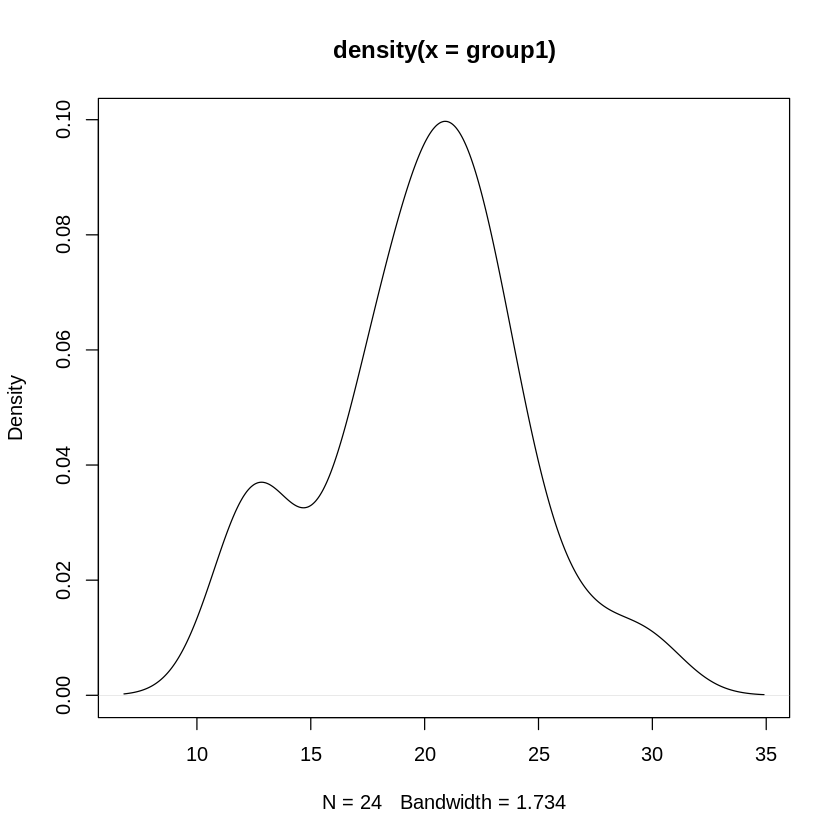

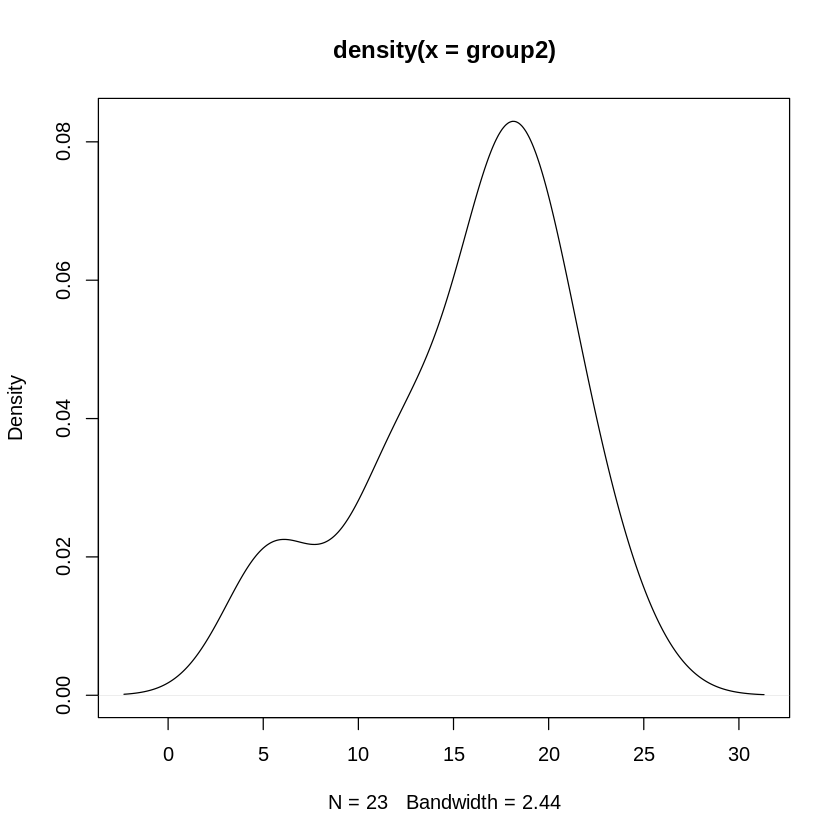

In [ ]:
plot(density(group1))
plot(density(group2))

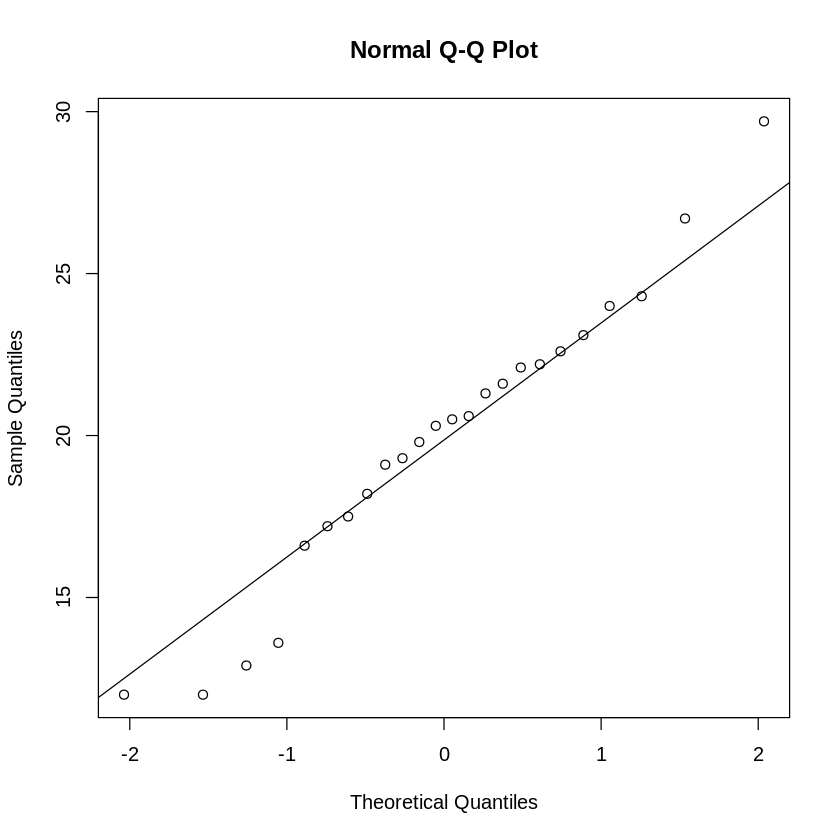

In [ ]:
qqnorm(group1)
qqline(group1)

### normality (2)

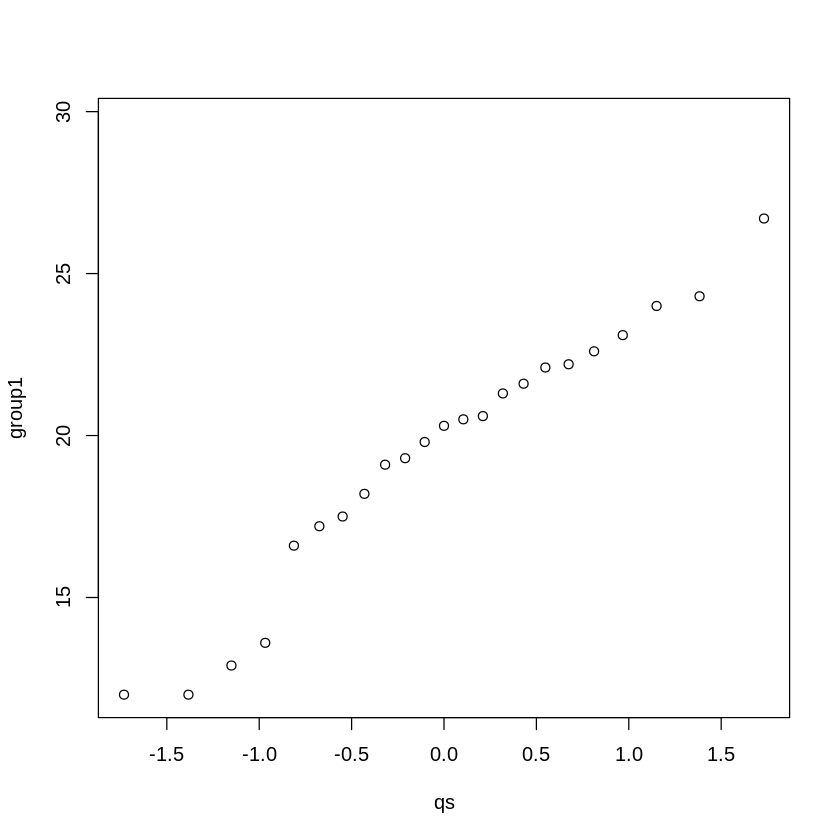

In [ ]:
nquantiles = ngroup1
quantile1  = 1/nquantiles
qs         = numeric(nquantiles)
for (i in 1:nquantiles){
  qi     = quantile1*i
  qs[i]  = qnorm(qi)
}
plot(qs,group1)

## Randomization (design-based inference)

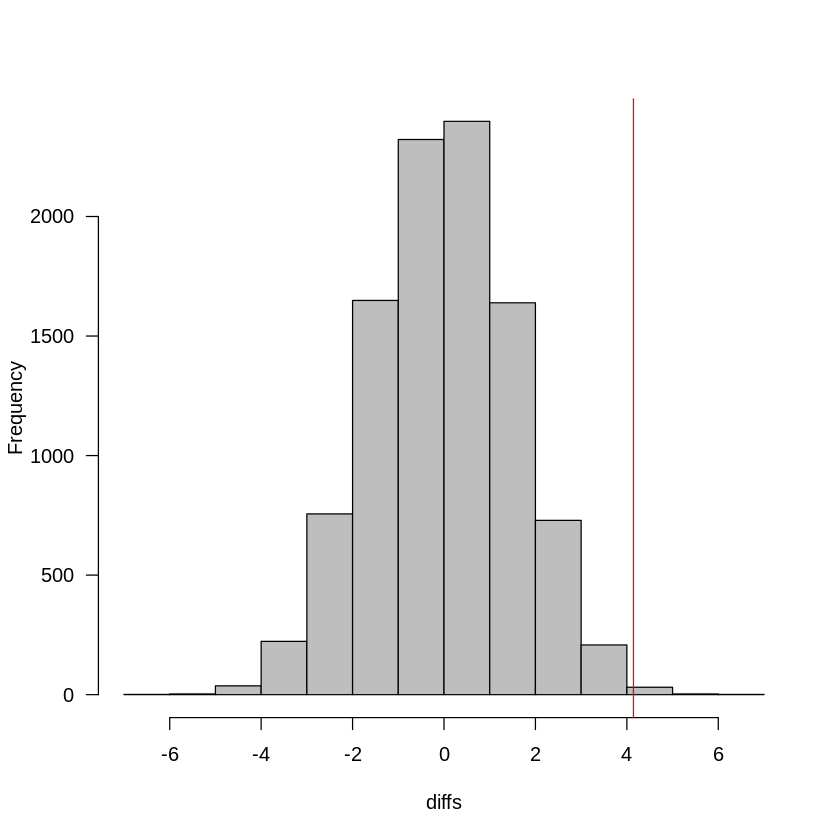

In [ ]:
nsamples   = 10000
diffs      = numeric(nsamples)
for (i in 1:nsamples){
  randi      = sample(c(group1,group2))
  group1i = randi[1:ngroup1]
  group2i = randi[-(1:ngroup1)]
  diffs[i]   = mean(group1i) - mean(group2i)
}
diff_obs = mean(group1) - mean(group2)

hist(diffs,col="gray",las=1,main="")
abline(v=diff_obs,col="red")

In [ ]:
(mean(diffs >= diff_obs))

[1] 0.0029